In [1]:
import tensorflow as tf
import numpy as np
import pickle
np.random.seed(7)

In [2]:
with open ('C:\\Users\\Wilfred\\Desktop\\Look-ahead-N\\input_layer_4_6_15_2.pickle','rb') as file:
    input_data = pickle.load(file)
permutation = list(np.random.permutation(input_data.shape[0]))
input_data = input_data[permutation,:]
print(input_data.shape)
x_train = input_data[:100000, :]
x_test = input_data[100000:105000, :]


(105000, 24)


In [3]:
with open ('C:\\Users\\Wilfred\\Desktop\\Look-ahead-N\\output_layer_4_6_15_2.pickle','rb') as file:
    output_data = pickle.load(file)
output_data = np.transpose(output_data)
output_data = output_data[permutation,:]
y_train = output_data[:100000, :]
y_test = output_data[100000:105000, :]
print(output_data.shape)

(105000, 12)


In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(200, input_shape = [24], activation = 'relu'),
    tf.keras.layers.Dense(200, activation = 'relu'),
    tf.keras.layers.Dense(200, activation = 'relu'),
    tf.keras.layers.Dense(200, activation = 'relu'),
    tf.keras.layers.Dense(200, activation = 'relu'),
    tf.keras.layers.Dense(12, activation = 'sigmoid')
])
adam = tf.keras.optimizers.Adam(lr = 0.007)
model.compile(optimizer = adam, loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, batch_size = 1024, epochs = 200, verbose = 2, validation_data = (x_test, y_test))


Train on 100000 samples, validate on 5000 samples
Epoch 1/200
100000/100000 - 6s - loss: 0.4050 - accuracy: 0.8341 - val_loss: 0.3252 - val_accuracy: 0.8512
Epoch 2/200
100000/100000 - 4s - loss: 0.2834 - accuracy: 0.8731 - val_loss: 0.2537 - val_accuracy: 0.8866
Epoch 3/200
100000/100000 - 4s - loss: 0.2428 - accuracy: 0.8900 - val_loss: 0.2307 - val_accuracy: 0.8962
Epoch 4/200
100000/100000 - 4s - loss: 0.2208 - accuracy: 0.9003 - val_loss: 0.2158 - val_accuracy: 0.9030
Epoch 5/200
100000/100000 - 4s - loss: 0.2049 - accuracy: 0.9082 - val_loss: 0.2021 - val_accuracy: 0.9103
Epoch 6/200
100000/100000 - 4s - loss: 0.1891 - accuracy: 0.9163 - val_loss: 0.1860 - val_accuracy: 0.9177
Epoch 7/200
100000/100000 - 4s - loss: 0.1766 - accuracy: 0.9212 - val_loss: 0.1770 - val_accuracy: 0.9202
Epoch 8/200
100000/100000 - 5s - loss: 0.1686 - accuracy: 0.9232 - val_loss: 0.1708 - val_accuracy: 0.9227
Epoch 9/200
100000/100000 - 4s - loss: 0.1600 - accuracy: 0.9264 - val_loss: 0.1646 - val_accu

KeyboardInterrupt: 

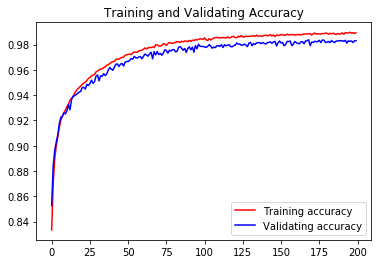

In [7]:
import matplotlib.pyplot as plt
plt.figure()
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validating accuracy')
plt.title('Training and Validating Accuracy')
#plt.title('Training Accuracy')
plt.legend()
plt.show()

In [8]:
#model.evaluate(x_test, y_test, verbose = 2)

5000/1 - 0s - loss: 0.0630 - accuracy: 0.9720


[0.04715186712741852, 0.9720002]

In [8]:
model.save('C:\\Users\\Wilfred\\Desktop\\weights\\Look_ahead_N\\Look_ahead_N_4_6_15_2_model.h5')

In [16]:
#json_string  = model.to_json()
#with open("C:\\Users\\Wilfred\\Desktop\\json_model.json", "w") as json_file:
#    json_file.write(json_string)

In [5]:
#model.save_weights('C:\\Users\\Wilfred\\Desktop\\Look_ahead_N_4_6_15_2_weights.h5')